In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [30]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [80]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [4]:
#view numbe rof paid off and not paid off loans 
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
import seaborn as sns

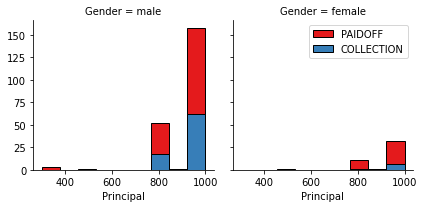

In [13]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

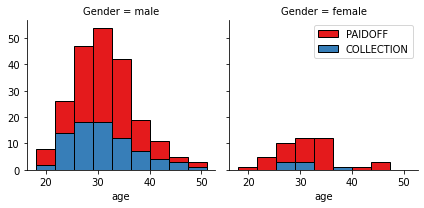

In [14]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [20]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)


Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [31]:
df['Gender'].replace(['male','female'],value=[0,1], inplace =True)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,0
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,0
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,0
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,0
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,0


In [32]:
#check the afect of education on loan repayment 
df.groupby(['education'])['loan_status'].value_counts(normalize =True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [38]:
#masters or above has no affect so can be dropped 
features = df[['Principal','terms','age','Gender']]
features = pd.concat([features, pd.get_dummies(df['education'])], axis = 1)
features.drop(['Master or Above'], axis = 1 , inplace=True)
features

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1
...,...,...,...,...,...,...,...
341,800,15,32,0,0,1,0
342,1000,30,25,0,0,1,0
343,800,15,39,0,0,0,1
344,1000,30,28,0,0,0,1


In [40]:
x =features
y = df['loan_status']
x = preprocessing.StandardScaler().fit(x).transform(x)

In [41]:
# use different classification techinque and determine accuracy using F1 and jaccard similarity score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state =4)

In [44]:
from sklearn import metrics

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

In [66]:
from sklearn.metrics import cohen_kappa_score,jaccard_score

In [56]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
mean_accuracy= np.zeros((k-1))
std_accuracy = np.zeros((k-1))
for n in range(1,k):
    neighbor = KNeighborsClassifier(n).fit(x_train, y_train)
    pred_knn = neighbor.predict(x_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test,pred_knn)
    std_accuracy[n-1] =np.std(pred_knn==y_test)/np.sqrt(pred_knn.shape[0]) 

Text(0, 0.5, 'Accuracy')

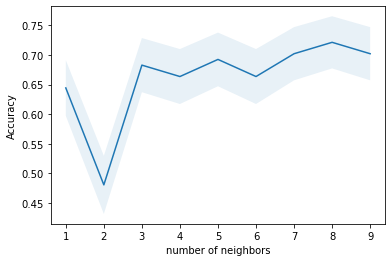

In [61]:
plt.plot(range(1,k),mean_accuracy)
plt.fill_between(range(1,k),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')

In [69]:
#highest accuracy is at a value of 8 so determine scores at this value
neighbor = KNeighborsClassifier(8).fit(x_train,y_train)
pred_knn_8= neighbor.predict(x_test)
f1_knn = f1_score(y_test,pred_knn_8, average='weighted')
cks_knn=cohen_kappa_score(y_test,pred_knn_8)
print ('KNN f1 score is',f1_knn)
print('KNN cohen kappa score is: ',cks_knn)

KNN f1 score is 0.649160839160839
KNN cohen kappa score is:  0.029601029601029727


In [70]:
#decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(criterion ='entropy', max_depth=4)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [71]:
DT_pred = DT.predict(x_test)

In [73]:
DT_f1 = f1_score(y_test, DT_pred, average='weighted')
D1_cks= cohen_kappa_score(y_test,DT_pred)
print ('Decision tree f1 score: ', DT_f1)
print ('Decision tree cohen kappa score: ', D1_cks)

Decision tree f1 score:  0.6299405014874628
Decision tree cohen kappa score:  0.0


In [76]:
#SVM
from sklearn import svm
Sup = svm.SVC(kernel='rbf')
Sup.fit(x_train,y_train)
SVM_pred= Sup.predict(x_test)
f1_svm =f1_score(y_test,SVM_pred,average='weighted')
cks_svm= cohen_kappa_score(y_test, SVM_pred)
print ('Support vector machine f1 score: ', f1_svm)
print ('Support vector machine cohen kappa score: ', cks_svm)


Support vector machine f1 score:  0.6299405014874628
Support vector machine cohen kappa score:  0.0


In [77]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C= 0.01, solver='liblinear').fit(x_train, y_train)

In [78]:
pred_LR = LR.predict(x_test)

In [79]:
pwd

'C:\\Users\\finla\\Desktop\\portfolio'